<a href="https://colab.research.google.com/github/alicescfernandes/AA_jupyter/blob/master/AA_22_10_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Lab date: 22/10/2025
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dt
import numpy.random as rd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
D=dt.load_digits() # carregar dataset dos digitos
X=D.data # carregar dados
y=D.target # carregar classes pre-treinadas

print(D.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


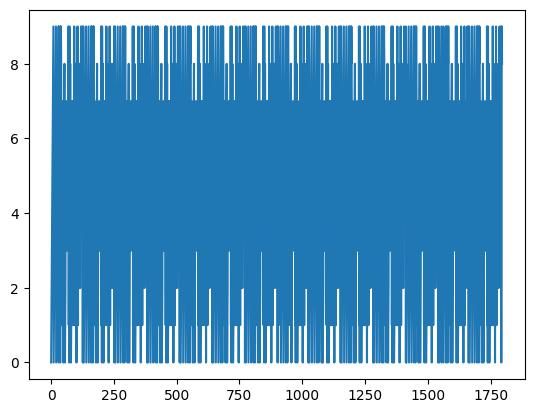

In [ ]:
X.shape # formato dos dados. 64 paremtros, 1797 linhas (N x d) (N -> numero de exemplos, d = numero dos parametros)
plt.plot(y) # se fosse ordenado, estava em escada (ver outros exemplos de dados)
plt.show()


In [ ]:
import numpy.random as rd
rd.permutation(10) # retorna numeros de 0 a 9 de forma aleatória. Para ser usado para baralhar os indexes dos dados X
rd.permutation(10)

idx=rd.permutation(X.shape[0])

X=X[idx,:] # trocar nas linhas, todas as as colunas de cada vez, array de 2 ou mais dimensões
y=y[idx] # trocar nas classes, array 1D

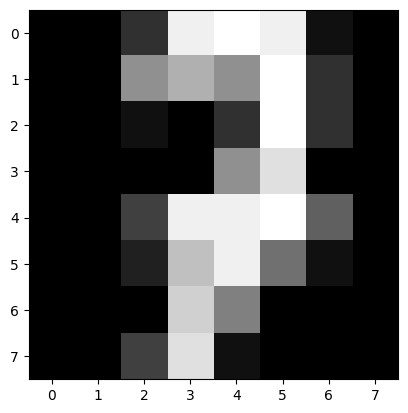

In [ ]:
plt.imshow(X[0,:].reshape(8,8), cmap="gray") # printar a primeira linha

In [ ]:
lr = LogisticRegression(max_iter=5000) # modelo de classificação
cross_val_score(lr, X, y, cv=5) # avaliar o modelo de classificação com base em KFolds (cross validation / validação cruzada)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [ ]:
# usar os kfolds com o lr que é o modelo de classificação, usando funções internas do scikit learn
ye = cross_val_predict(lr, X, y, cv=5)

In [ ]:
print(confusion_matrix(y,ye))
np.sum(y!=ye) #percentagen de

[[25 18 11 19 14 16 25 15 22 13]
 [22 17 15 21 19 13 19 14 17 25]
 [15 22 11 19 21 26 17 15 15 16]
 [22 22 11 22 20 23 15 13 17 18]
 [18 17 18 22 16 22 13 20 19 16]
 [12 20 23 14 14 19 26 21 17 16]
 [25 25 16 19 14 21 14 11 18 18]
 [16 18 13 20 21 21 15 25 15 15]
 [17 20 11 15 13 27 20 14 21 16]
 [19 17 15 19 17 19 16 16 24 18]]


np.int64(1609)

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

cv=KFold(n_splits=5) # dá mais controlo sobre o numero de kfolds
ye=cross_val_score(lr, X, y, cv=cv) # avaliar o modelo com base nos dados X e nas classes pré-determinadas (y)

In [ ]:
D=dt.load_iris() # este dataset tem apenas 3 classes, com os dados ordenados por cada classe
X=D.data
y=D.target
cross_val_score(lr, X, y, cv=5) # validar o modelo LR com base em 5 kfolds

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [ ]:
cv=KFold(n_splits=3) # dados estao divididos em 3, cada kfold com os dados de uma classe. dá 0 em tudo na validação
cross_val_score(lr, X, y, cv=cv)

array([0., 0., 0.])

In [ ]:
cv=StratifiedKFold(n_splits=3) # dados estao divididos em 3, StratifiedKFold garante que 1/3 de cada classe está em cada fold
cross_val_score(lr, X, y, cv=cv)

array([0.98, 0.96, 0.98])

In [ ]:
cv=KFold(n_splits=3, shuffle=True) # divisão em 3 com baralho dos dados
cross_val_score(lr, X, y, cv=cv)

array([0.96, 1.  , 0.94])